# Problem Set 2

**Context:** Consider the [dataset used in Koop and
*Tobias](https://github.com/simoneSantoni/data-viz-smm635/tree/master/data/koopAndTobias),
*which concerns the relationship between schooling and wage at the individual
*level.

**Task**: Create a Matplotlib figure that illustrates:

-   the univariate distributions of the following variables: 'EDUC', 'LOGWAGE', 'ABILITY', 'MOTHERED', 'FATHERED', and 'SIBLINGS';
-   the bivariate distribution of any possible pair of the above-mentioned variables;
-   submissions should build on Matplotlib only (that is, I won't accept Seaborn code);
-   to do the job, you can use as many 'ax' as you want;
-   the figure should fit an A4 page, landscape layout;
-   the audience is 'Dr. Asimit' - the visualization has to be included in the final year dissertation BA students have to deliver.

# Koop & Tobas' Dataset

This dataset comes from the paper by Koop and Tobias, "Learning About
Heterogeneity in Returns to Schooling," Journal of Applied Econometrics, 18,
2004, pp. 827-849.

The file contains the panel of 17,919 observations on the Person ID and 4
time-varying variables. The data were downloaded from the Journal of Applied
Econometrics archive website.

Below is the account of the variables in the file:

+   PERSONID = Person id (ranging from 1 to 2,178),
+   EDUC = Education,
+   LOGWAGE = Log of hourly wage,
+   POTEXPER = Potential experience,
+   TIMETRND = Time trend. Time Invariant
+   ABILITY = Ability,
+   MOTHERED = Mother's education,
+   FATHERED = Father's education,
+   BRKNHOME = Dummy variable for residence in a broken home,
+   SIBLINGS = Number of siblings.

# Tasks
Create a Matplotlib figure that illustrate the **univariate distributions** of the following variables:\
`'EDUC'`, `'LOGWAGE'`, `'ABILITY'`, `'MOTHERED'`, `'FATHERED'`, and `'SIBLINGS'`\
and the **bivariate distribution** of any possible pair of the above-mentioned variables

# Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import gridspec

# Import dataset
Please make sure `voravich_ch_smm635_prob2.ipynb` and `koop_tobias.csv` are in the same folder

In [2]:
# import the dataset and store it as `df` variable
df = pd.read_csv('koop_tobias.csv')

# Data Exploration

In [3]:
# explore data structure
df.head()

,PERSONID,EDUC,LOGWAGE,POTEXPER,TIMETRND,ABILITY,MOTHERED,FATHERED,BRKNHOME,SIBLINGS
0,1,13,1.82,1,0,1.0,12,12,0,1
1,1,18,3.29,3,7,1.0,12,12,0,1
2,1,18,3.21,5,9,1.0,12,12,0,1
3,1,18,3.06,6,10,1.0,12,12,0,1
4,2,15,2.14,4,6,1.5,12,12,0,1


In [4]:
# remove unnecessary columns
df.drop(columns = ['POTEXPER', 'BRKNHOME'], inplace = True)

In [5]:
df.head()

,PERSONID,EDUC,LOGWAGE,TIMETRND,ABILITY,MOTHERED,FATHERED,SIBLINGS
0,1,13,1.82,0,1.0,12,12,1
1,1,18,3.29,7,1.0,12,12,1
2,1,18,3.21,9,1.0,12,12,1
3,1,18,3.06,10,1.0,12,12,1
4,2,15,2.14,6,1.5,12,12,1


In [6]:
# I realized there is a white space at the end of 'SIBLINGS' column so I need to clean it
df.columns = df.columns.str.strip()

In [7]:
# check whether the variables, that are going to be plotted, vary across time for each individual
var_list = ['EDUC', 'LOGWAGE', 'ABILITY', 'MOTHERED', 'FATHERED', 'SIBLINGS']
# group the data by 'PERSONID', get the difference between max and min for each variable and sum each column
df.groupby('PERSONID')[var_list].apply(lambda x: np.max(x) - np.min(x)).sum(axis = 0)

EDUC        1177.00
LOGWAGE     1988.53
ABILITY        0.00
MOTHERED       0.00
FATHERED       0.00
SIBLINGS       0.00
dtype: float64

The only time varying variables are: `EDUC` and `LOGWAGE`

In [8]:
pd.DataFrame(df.groupby('PERSONID')['TIMETRND'].agg('min')).rename(columns = {'TIMETRND': 'FIRST_COLLECTION'}).head()

,FIRST_COLLECTION
PERSONID,
1,0
2,6
3,2
4,3
5,3


Each individual datum was not started collecting at `TIMETRND==0` as well as the data collections were not unifromed and thus it worths to keep in mind that this is an **balanced panel data**.

## 'EDUC': Data preprocessing

`'EDUC'` is an ordinal categorical variable

In [9]:
df_educ = pd.DataFrame(df.groupby('PERSONID')['EDUC'].agg(['min', 'max'])).rename(columns = {'min': 'MIN_EDUC', 'max': 'MAX_EDUC'})
df_educ.head()

,MIN_EDUC,MAX_EDUC
PERSONID,,
1,13,18
2,15,15
3,10,10
4,12,13
5,15,15


In [10]:
pd.Series(df_educ['MIN_EDUC'].sort_values()).unique()

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [11]:
pd.Series(df_educ['MAX_EDUC'].sort_values()).unique()

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

The categories for `MIN_EDUC` and `MAX_EDUC` are the same; therefore, I will use them as ticklabels for the bar chart

In [12]:
# Prepare data for frequency plot
# create 'COUNT' row for frequency computation
df_educ.loc[:, 'COUNT'] =1

In [13]:
# create a dictionary where keys are the categories and values are frequencies
min_educ = dict(df_educ.groupby('MIN_EDUC')['COUNT'].agg(np.sum))
max_educ = dict(df_educ.groupby('MAX_EDUC')['COUNT'].agg(np.sum))

In [14]:
# make the y-axis as percentages
min_educ = np.divide(list(min_educ.values()),np.sum(list(min_educ.values())))
max_educ = np.divide(list(max_educ.values()),np.sum(list(max_educ.values())))

In [15]:
plt.style.use('default')

<ipython-input-16-24d1ed5ecc89>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tick_label)


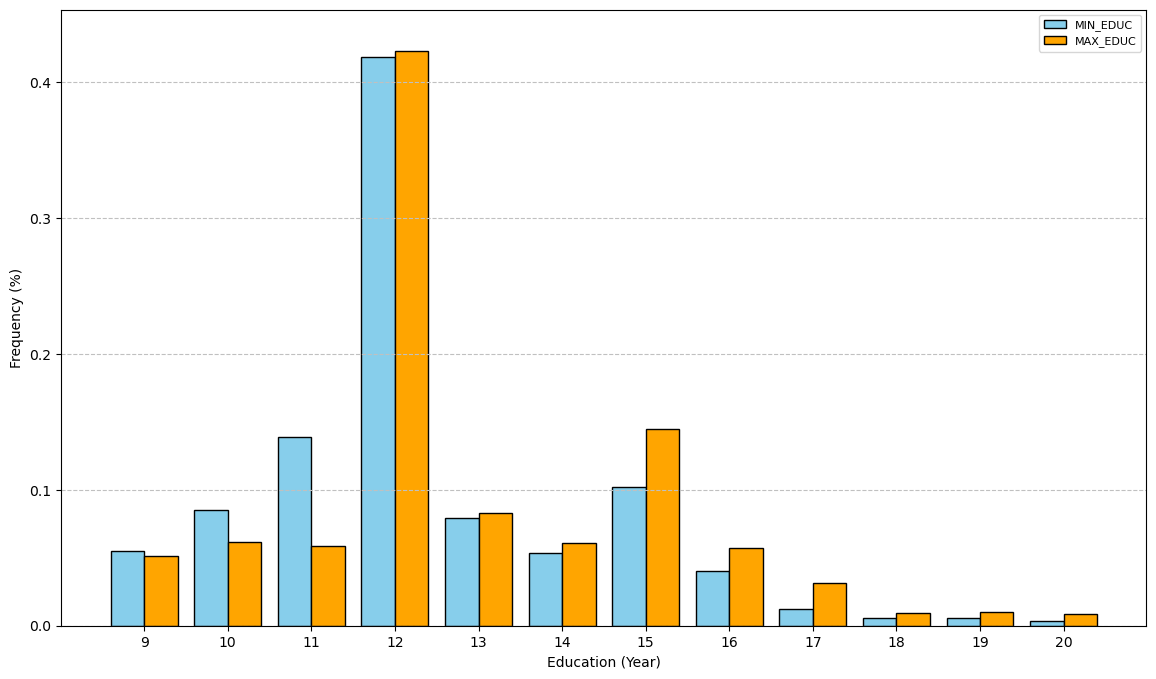

In [16]:
tick_label = pd.Series(df_educ['MIN_EDUC'].sort_values()).unique()
label_loc = np.arange(len(tick_label))
bar_width = 0.4

fig = plt.figure(figsize = (14,8))
ax = fig.add_subplot(1, 1, 1)

ax.bar(label_loc - bar_width / 2, height = min_educ, width = bar_width, 
        color = 'skyblue', edgecolor = 'k', label = 'MIN_EDUC')
ax.bar(label_loc + bar_width / 2, height = max_educ, width = bar_width,
        color = 'orange', edgecolor = 'k', label = 'MAX_EDUC')

# rescale y-axis to add some more space
max_ylim = plt.ylim()[1]
plt.ylim(top = max_ylim * 1.02)

ax.grid(True, axis = 'y', color = 'silver', ls = '--')
ax.grid(False, axis = 'x')

ax.set_xticklabels(tick_label)
ax.set_xticks(label_loc)

ax.set_xlabel("Education (Year)")
ax.set_ylabel("Frequency (%)")

ax.legend(loc="best", fontsize = 8)

plt.show()

## 'LOGWAGE': Data preprocessing

`'LOGWAGE'` is a continuous variable

In [17]:
df.head()

,PERSONID,EDUC,LOGWAGE,TIMETRND,ABILITY,MOTHERED,FATHERED,SIBLINGS
0,1,13,1.82,0,1.0,12,12,1
1,1,18,3.29,7,1.0,12,12,1
2,1,18,3.21,9,1.0,12,12,1
3,1,18,3.06,10,1.0,12,12,1
4,2,15,2.14,6,1.5,12,12,1


In [18]:
df_logwage = pd.DataFrame(df['LOGWAGE'])

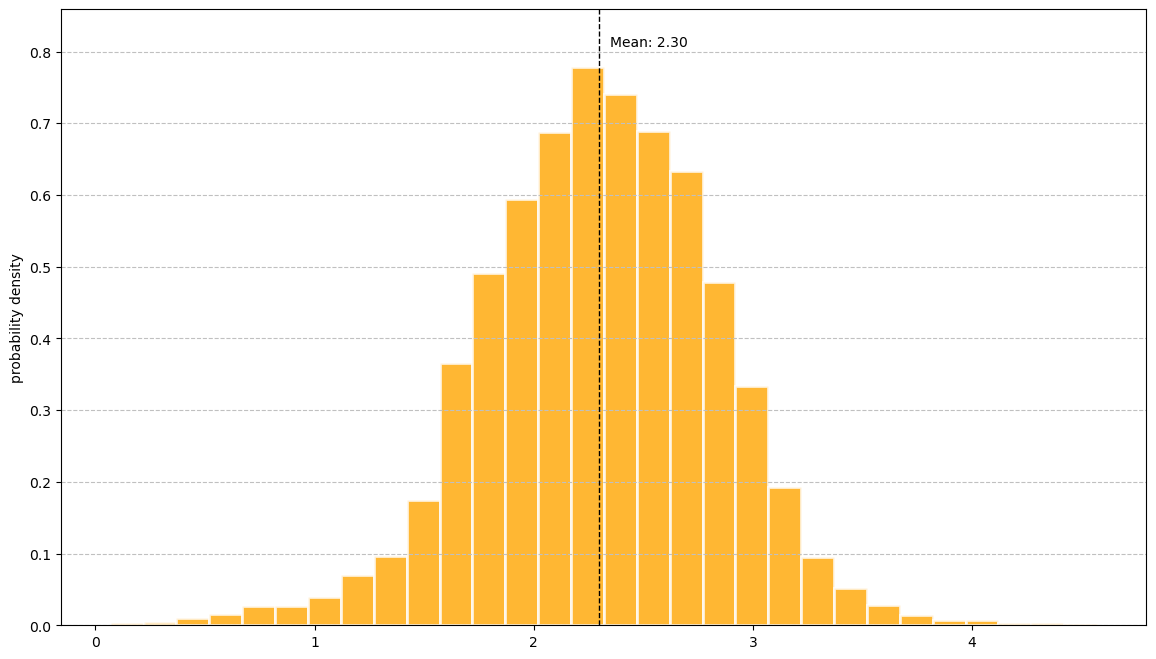

In [19]:
fig = plt.figure(figsize = (14,8))
ax = fig.add_subplot(1, 1, 1)
ax.hist(df_logwage['LOGWAGE'], color="orange", bins = 30, alpha = 0.8, density = True, 
        edgecolor = "w", linewidth = 2)

# rescale y-axis to add some more space
max_ylim = plt.ylim()[1]
plt.ylim(top = max_ylim * 1.05)
# add a line for mean
ax.axvline(df_logwage['LOGWAGE'].mean(), color='k', linestyle = '--', linewidth = 1)
min_ylim, max_ylim = plt.ylim()
ax.text(df_logwage['LOGWAGE'].mean()+0.05, max_ylim*0.94, 'Mean: {:.2f}'.format(df_logwage['LOGWAGE'].mean()))
ax.set_ylabel("probability density")

ax.grid(True, axis = 'y', color = 'silver', ls = '--')
ax.grid(False, axis = 'x')

plt.show()

## 'ABILITY': Data preprocessing

`'ABILITY'` is a continuous variable

In [20]:
# since 'ABILITY' is not a time-varying variable, let's remove the time dimension
df_ability = pd.DataFrame(df.groupby('PERSONID')['ABILITY'].agg(np.mean))

In [21]:
df_ability

,ABILITY
PERSONID,
1,1.00
2,1.50
3,-0.36
4,0.26
5,0.30
...,...
2174,0.46
2175,1.08
2176,-1.79


In [22]:
df_ability.head()

,ABILITY
PERSONID,
1,1.00
2,1.50
3,-0.36
4,0.26
5,0.30


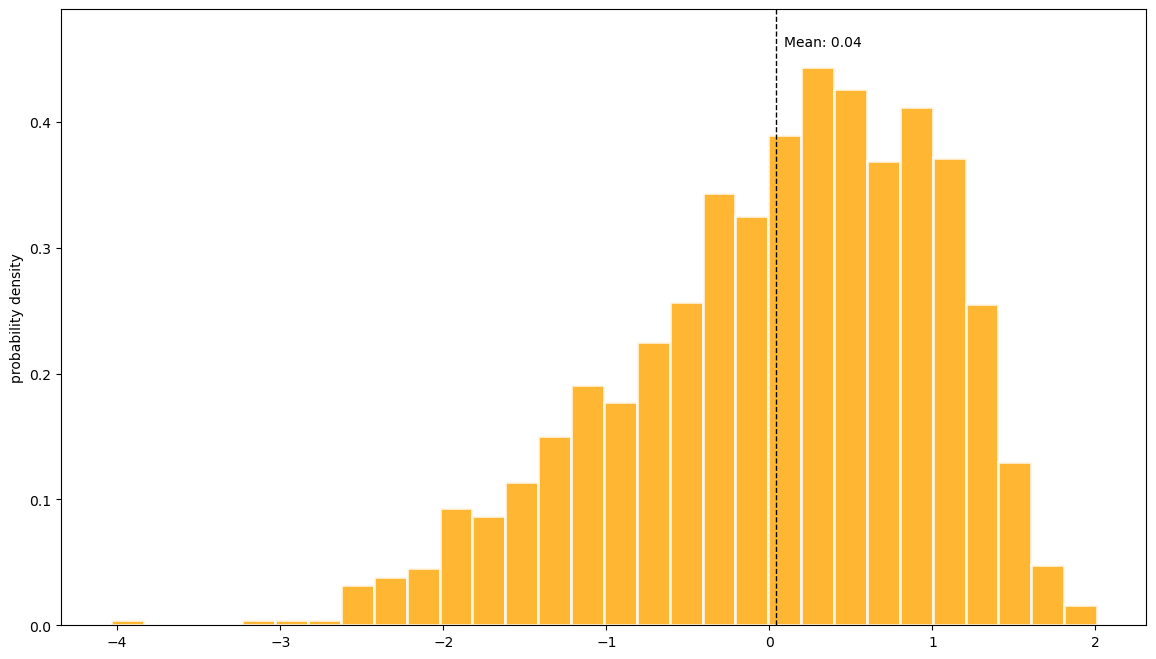

In [23]:
fig = plt.figure(figsize = (14,8))
ax = fig.add_subplot(1, 1, 1)
ax.hist(df_ability['ABILITY'], color="orange", bins = 30, alpha = 0.8, density = True, 
        edgecolor = "w", linewidth = 2)

# rescale y-axis to add some more space
max_ylim = plt.ylim()[1]
plt.ylim(top = max_ylim * 1.05)
# add a line for mean
ax.axvline(df_ability['ABILITY'].mean(), color='k', linestyle = '--', linewidth = 1)
min_ylim, max_ylim = plt.ylim()
ax.text(df_ability['ABILITY'].mean()+0.05, max_ylim*0.94, 'Mean: {:.2f}'.format(df_ability['ABILITY'].mean()))
ax.set_ylabel("probability density")


plt.show()

## 'MOTHERED': Data preprocessing

`'MOTHERED'` is an ordinal categorical variable

In [24]:
# since 'MOTHERED' is not a time-varying variable, let's remove the time dimension
df_mothered = pd.DataFrame(df.groupby('PERSONID')['MOTHERED'].agg(np.mean))

In [25]:
df_mothered.head()

,MOTHERED
PERSONID,
1,12
2,12
3,12
4,12
5,12


In [26]:
pd.Series(df_mothered['MOTHERED'].sort_values()).unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

There are 21 classes in `MOTHERED` variable so I decided to group them by level of education

In [27]:
for i, v in df_mothered['MOTHERED'].items():
    if v < 12:
        df_mothered.loc[i, 'DEGREE'] = 'Less_than_high_school'
    elif v == 12:
        df_mothered.loc[i, 'DEGREE'] = 'High_school_completion'
    elif 12 < v < 16:
        df_mothered.loc[i, 'DEGREE'] = 'Some_college_or_Associates_degree'
    elif v == 16:
        df_mothered.loc[i, 'DEGREE'] = 'Bachelors_degree'
    else:
        df_mothered.loc[i, 'DEGREE'] = 'Advanced_degree'

In [28]:
# Prepare data for frequency plot
# create 'COUNT' row for frequency computation
df_mothered.loc[:, 'COUNT'] = 1

In [29]:
df_mothered.head()

,MOTHERED,DEGREE,COUNT
PERSONID,,,
1,12,High_school_completion,1
2,12,High_school_completion,1
3,12,High_school_completion,1
4,12,High_school_completion,1
5,12,High_school_completion,1


In [30]:
# generate frequencies
moth = dict(df_mothered.groupby('DEGREE')['COUNT'].agg(np.sum))

<ipython-input-31-bb7cafbfdf26>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tick_label)
No handles with labels found to put in legend.


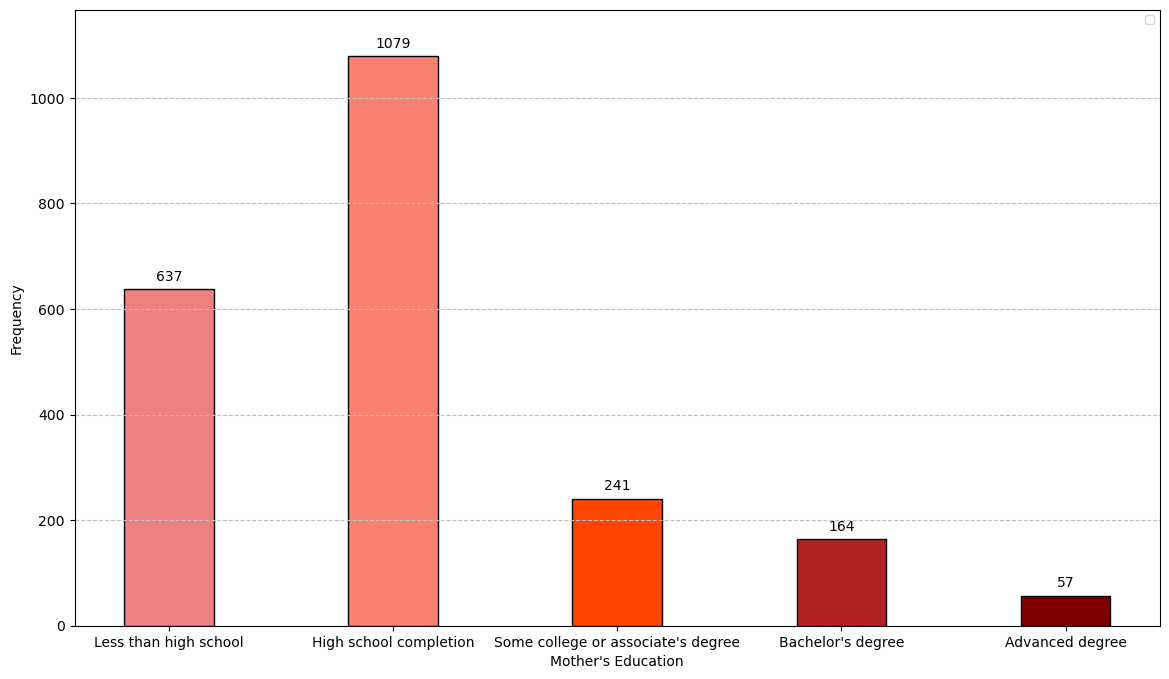

In [31]:
# sort values for the plot
tickvalues = [moth['Less_than_high_school'], moth['High_school_completion'], moth['Some_college_or_Associates_degree'], moth['Bachelors_degree'], moth['Advanced_degree']]
tick_label = ["Less than high school", "High school completion", "Some college or associate's degree", "Bachelor's degree", "Advanced degree"]
label_loc = np.arange(len(tick_label))
bar_width = 0.4

fig = plt.figure(figsize = (14,8))
ax = fig.add_subplot(1, 1, 1)

bars = ax.bar(label_loc, height = tickvalues, width = bar_width, 
        color = ['lightcoral','salmon', 'orangered', 'firebrick', 'maroon'], edgecolor = 'k')

# rescale y-axis to add some more space
max_ylim = plt.ylim()[1]
plt.ylim(top = max_ylim * 1.03)

# label each bar by frequency
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy = (bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 4),  # raise the y-coordinate by 4 points
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.grid(True, axis = 'y', color = 'silver', ls = '--')
ax.grid(False, axis = 'x')

ax.set_xticklabels(tick_label)
ax.set_xticks(label_loc)

ax.set_xlabel("Mother's Education")
ax.set_ylabel("Frequency")

ax.legend(loc="best", fontsize = 8)

plt.show()

## 'FATHERED': Data preprocessing

`'FATHERED'` is an ordinal categorical variable

The logic for `'FATHERED'` is the same as `'MOTHERED'`

In [32]:
# since 'FATHERED' is not a time-varying variable, let's remove the time dimension
df_fathered = pd.DataFrame(df.groupby('PERSONID')['FATHERED'].agg(np.mean))

In [33]:
df_fathered.head()

,FATHERED
PERSONID,
1,12
2,12
3,12
4,10
5,12


In [34]:
pd.Series(df_fathered['FATHERED'].sort_values()).unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [35]:
# similar to MOTHERED, I group father's education by degree levels
for i, v in df_fathered['FATHERED'].items():
    if v < 12:
        df_fathered.loc[i, 'DEGREE'] = 'Less_than_high_school'
    elif v == 12:
        df_fathered.loc[i, 'DEGREE'] = 'High_school_completion'
    elif 12 < v < 16:
        df_fathered.loc[i, 'DEGREE'] = 'Some_college_or_Associates_degree'
    elif v == 16:
        df_fathered.loc[i, 'DEGREE'] = 'Bachelors_degree'
    else:
        df_fathered.loc[i, 'DEGREE'] = 'Advanced_degree'

In [36]:
# Prepare data for frequency plot
# create 'COUNT' row for frequency computation
df_fathered.loc[:, 'COUNT'] = 1

In [37]:
df_fathered.head()

,FATHERED,DEGREE,COUNT
PERSONID,,,
1,12,High_school_completion,1
2,12,High_school_completion,1
3,12,High_school_completion,1
4,10,Less_than_high_school,1
5,12,High_school_completion,1


In [38]:
# generate frequencies
fath = dict(df_fathered.groupby('DEGREE')['COUNT'].agg(np.sum))

<ipython-input-39-d4de628bb4b8>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tick_label)


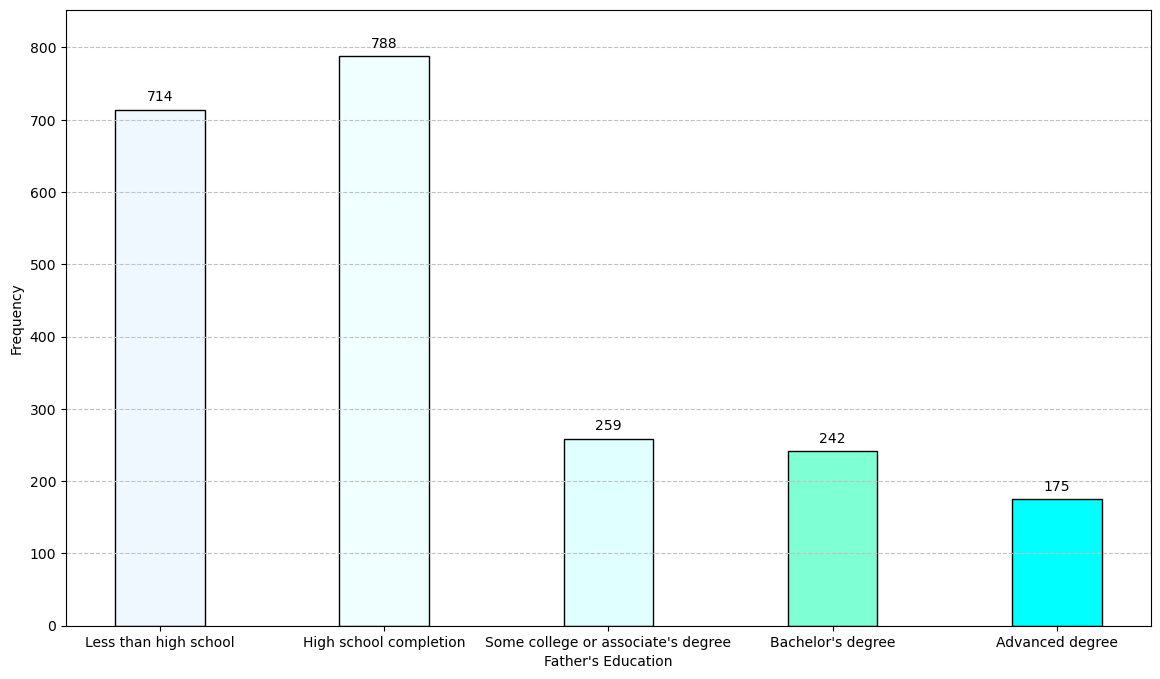

In [39]:
# sort values for the plot
tickvalues = [fath['Less_than_high_school'], fath['High_school_completion'], fath['Some_college_or_Associates_degree'], fath['Bachelors_degree'], fath['Advanced_degree']]
tick_label = ["Less than high school", "High school completion", "Some college or associate's degree", "Bachelor's degree", "Advanced degree"]
label_loc = np.arange(len(tick_label))
bar_width = 0.4

fig = plt.figure(figsize = (14,8))
ax = fig.add_subplot(1, 1, 1)

bars = ax.bar(label_loc, height = tickvalues, width = bar_width,
              color = ['aliceblue','azure', 'lightcyan', 'aquamarine', 'cyan'], edgecolor = 'k')

# rescale y-axis to add some more space
max_ylim = plt.ylim()[1]
plt.ylim(top = max_ylim * 1.03)

# label each bar by frequency
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy = (bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 4),  # raise the y-coordinate by 4 points
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.grid(True, axis = 'y', color = 'silver', ls = '--')
ax.grid(False, axis = 'x')

ax.set_xticklabels(tick_label)
ax.set_xticks(label_loc)

ax.set_xlabel("Father's Education")
ax.set_ylabel("Frequency")

plt.show()

## 'SIBLINGS': Data preprocessing

`'SIBLINGS'` is an ordinal categorical variable

In [40]:
# since 'SIBLINGS' is not a time-varying variable, let's remove the time dimension
df_siblings = pd.DataFrame(df.groupby('PERSONID')['SIBLINGS'].agg(np.mean))

In [41]:
df_siblings.head()

,SIBLINGS
PERSONID,
1,1
2,1
3,1
4,4
5,1


In [42]:
df_siblings.describe()

,SIBLINGS
count,2178.000000
mean,3.143710
std,2.142813
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,18.000000


In [43]:
pd.Series(df_siblings['SIBLINGS'].sort_values()).unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       18])

In [44]:
# Prepare data for frequency plot
# create 'COUNT' row for frequency computation
df_siblings.loc[:, 'COUNT'] =1

In [45]:
# generate frequencies
sib = dict(df_siblings.groupby('SIBLINGS')['COUNT'].agg(np.sum))

In [46]:
# There is no individual who has 17 siblings so I decided to add the key to the dict
sib[17] = 0
# sort the dicitonary keys in ascending order
sib = dict(sorted(sib.items()))

<ipython-input-47-ad2212a3bb9e>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(skip_label)


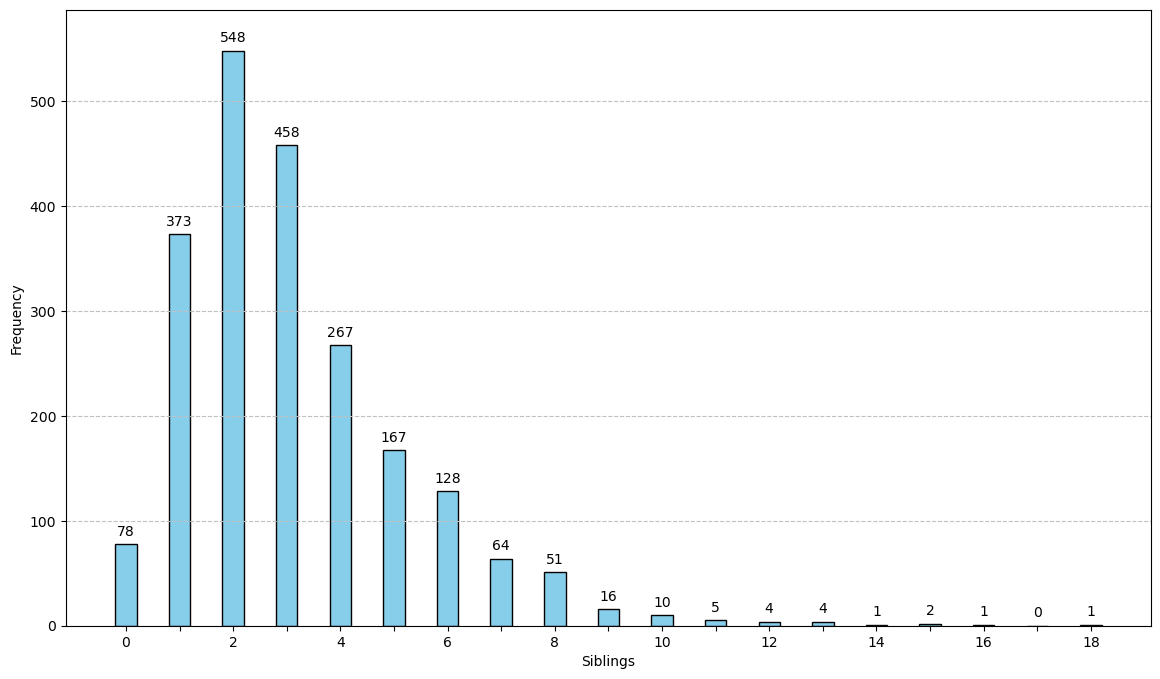

In [47]:
# get values from the dictionary for tickvalues
tickvalues = list(sib.values())
# get keys from the dictionary for ticklabels
ticklabels = list(sib.keys())

tick_label = ticklabels
label_loc = np.arange(len(tick_label))
bar_width = 0.4

fig = plt.figure(figsize = (14,8))
ax = fig.add_subplot(1, 1, 1)

bars = ax.bar(label_loc, height = tickvalues, width = bar_width, 
        color = 'skyblue', edgecolor = 'k')


# label each bar by frequency
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy = (bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 4),  # raise the y-coordinate by 4 points
                    textcoords="offset points",
                    ha='center', va='bottom')


# rescale y-axis to add some more space
max_ylim = plt.ylim()[1]
plt.ylim(top = max_ylim * 1.02)

ax.grid(True, axis = 'y', color = 'silver', ls = '--')
ax.grid(False, axis = 'x')

# generate skip label
skip_label = []
for value in tick_label:
    if value % 2 == 0:
        skip_label.append(value)
    else:
        skip_label.append('')

ax.set_xticklabels(skip_label)
ax.set_xticks(tick_label)
ax.set_xlabel("Siblings")
ax.set_ylabel("Frequency")


plt.show()

## Bivariate Distribution: Ability-Logwage

In [48]:
# create a pandas serie that contains True if the individual return to study and False vice versa
RETURNTOSCHOOL = df.groupby('PERSONID')['EDUC'].agg(lambda x: x.max() - x.min())>0

In [49]:
# rename the column name to 'RETURNTOSCHOOL' before merging this serie into pandas dataframe
RETURNTOSCHOOL.rename('RETURNTOSCHOOL', inplace = True)

PERSONID
1        True
2       False
3       False
4        True
5       False
        ...  
2174    False
2175     True
2176    False
2177    False
2178    False
Name: RETURNTOSCHOOL, Length: 2178, dtype: bool

In [50]:
# merge the data into a new dataframe named df_t (t stands for 'transformed')
df = pd.merge(df, RETURNTOSCHOOL.astype(int), on = 'PERSONID', how = 'left')
df.head()

,PERSONID,EDUC,LOGWAGE,TIMETRND,ABILITY,MOTHERED,FATHERED,SIBLINGS,RETURNTOSCHOOL
0,1,13,1.82,0,1.0,12,12,1,1
1,1,18,3.29,7,1.0,12,12,1,1
2,1,18,3.21,9,1.0,12,12,1,1
3,1,18,3.06,10,1.0,12,12,1,1
4,2,15,2.14,6,1.5,12,12,1,0


In [51]:
# get average logwage for each individual and other necessary variables for the plot
df_bivar = df.groupby('PERSONID')[['ABILITY', 'LOGWAGE', 'RETURNTOSCHOOL']].agg(np.mean)

In [52]:
df_bivar

,ABILITY,LOGWAGE,RETURNTOSCHOOL
PERSONID,,,
1,1.00,2.845000,1
2,1.50,2.446667,0
3,-0.36,1.560000,0
4,0.26,2.099167,1
5,0.30,2.490000,0
...,...,...,...
2174,0.46,2.565000,0
2175,1.08,2.542222,1
2176,-1.79,2.126667,0


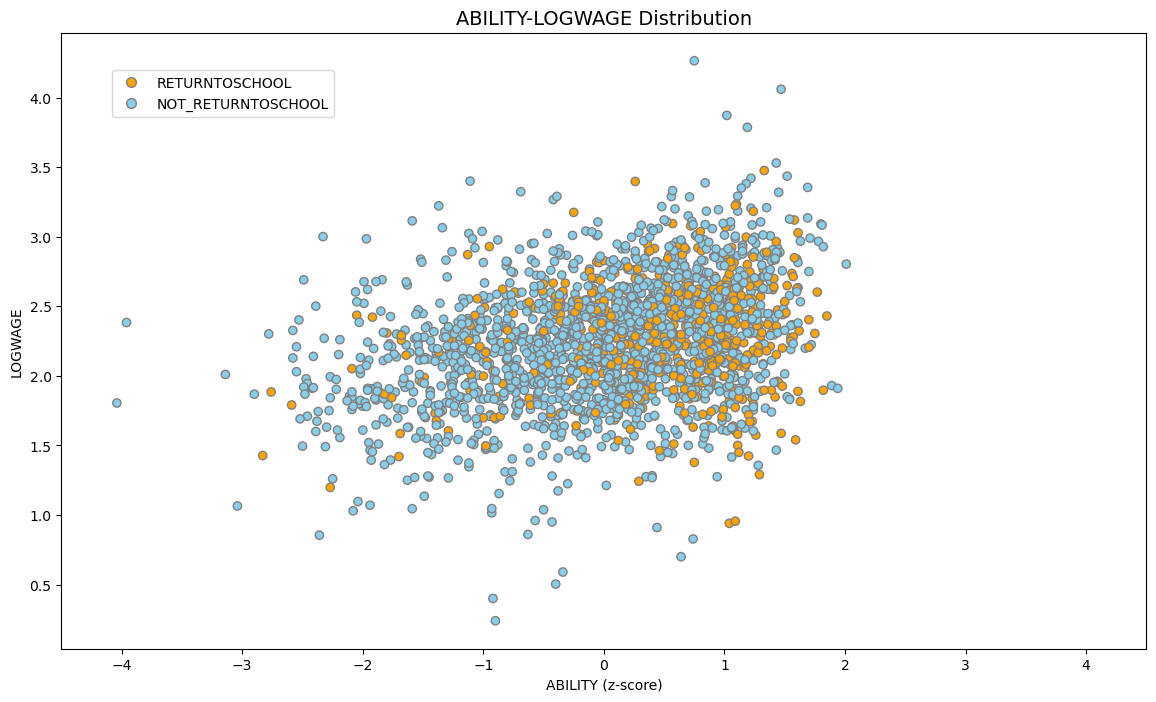

In [53]:
fig = plt.figure(figsize = (14,8))
ax = fig.add_subplot(1, 1, 1)

# determine colors for the visualization
colors = {0: 'skyblue', 1: 'orange'}

ax.scatter(df_bivar['ABILITY'], df_bivar['LOGWAGE'], 
            c = df_bivar['RETURNTOSCHOOL'].apply(lambda x: colors[x]), edgecolor='grey')

ax.grid(False, axis = 'both')

ax.set_xlabel("ABILITY (z-score)")
ax.set_ylabel("LOGWAGE")
ax.set_title("ABILITY-LOGWAGE Distribution", fontsize = 14)

import matplotlib.lines as mlines
orange_dot = mlines.Line2D([], [], color='orange', marker='o', markeredgecolor='grey', 
                               linestyle='None', markersize=7, label='RETURNTOSCHOOL')
skyblue_dot = mlines.Line2D([], [], color='skyblue', marker='o', markeredgecolor='grey',
                                  linestyle='None', markersize=7, label='NOT_RETURNTOSCHOOL')

ax.legend(handles=[orange_dot, skyblue_dot],
          loc = 'upper left', bbox_to_anchor=(0.04,0.95),
          facecolor = 'w')

ax.set_xlim(-4.5, 4.5)

plt.show()


# Data Visualization

<ipython-input-54-dce9455b0d32>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(tick_label)
<ipython-input-54-dce9455b0d32>:123: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(tick_label, rotation = 30, fontsize = 8)
<ipython-input-54-dce9455b0d32>:156: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(tick_label, rotation = 30, fontsize = 8)
<ipython-input-54-dce9455b0d32>:203: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(skip_label)


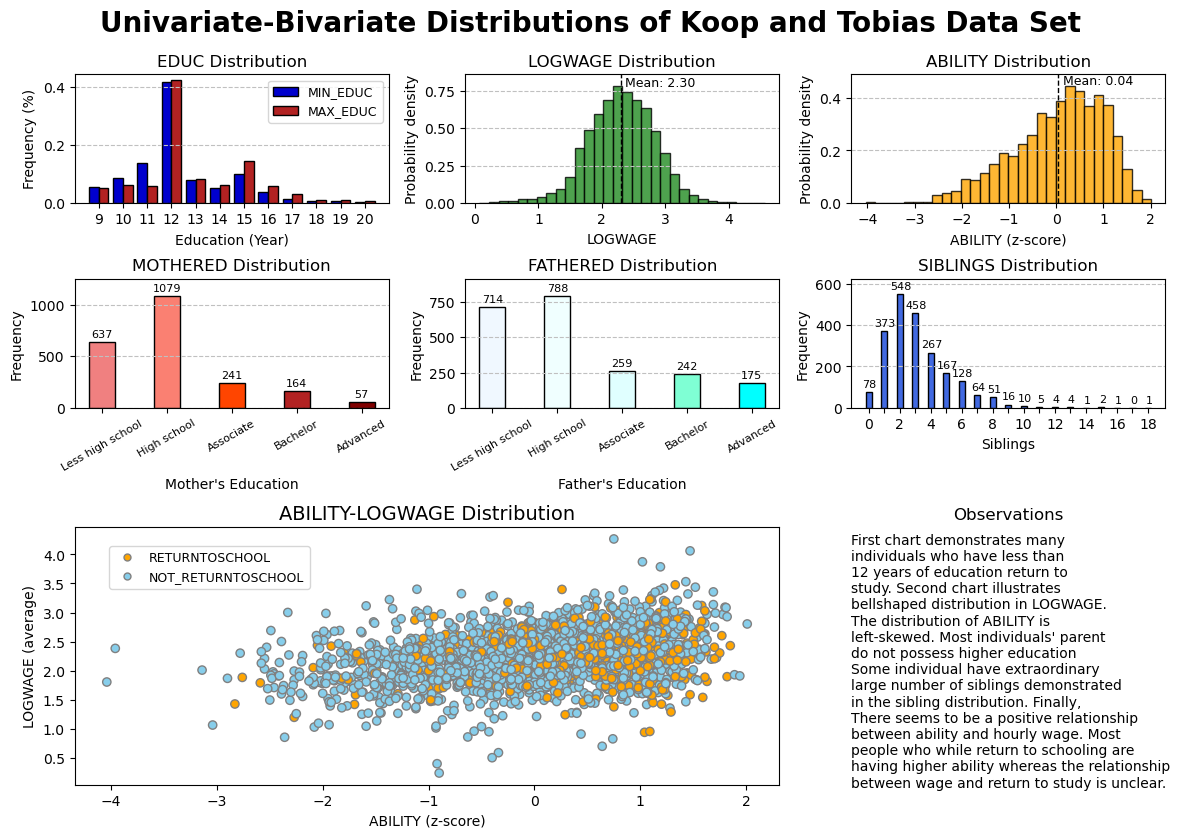

In [54]:
""" Setup """
# create the figure: A4 landscape size = (11.69, 8.27)
fig = plt.figure(figsize = (11.69, 8.27), constrained_layout = True)

# populate subplots and customize their sizes and locations
spec = gridspec.GridSpec(ncols = 3, nrows = 4, figure = fig)
# for 'EDUC' Distribution
ax0 = fig.add_subplot(spec[0, 0]) 
# for 'LOGWAGE' Distribution
ax1 = fig.add_subplot(spec[0, 1])
# for 'ABILITY' Distribution
ax2 = fig.add_subplot(spec[0, 2])
# for 'MOTHERED' Distribution
ax3 = fig.add_subplot(spec[1, 0])
# for 'FATHERED' Distribution
ax4 = fig.add_subplot(spec[1, 1])
# for 'SIBLINGS' Distribution
ax5 = fig.add_subplot(spec[1, 2])
# for Bivariate Distribution
ax6 = fig.add_subplot(spec[2:4, 0:2])
# for Comment
ax7 = fig.add_subplot(spec[2:4, 2])

# set plot style
plt.style.use('default')

# ------------------------------------------------------------------------

""" EDUC Univariate """
tick_label = pd.Series(df_educ['MIN_EDUC'].sort_values()).unique()
label_loc = np.arange(len(tick_label))
bar_width = 0.4

ax0.bar(label_loc - bar_width / 2, height = min_educ, width = bar_width, 
        color = 'mediumblue', edgecolor = 'k', label = 'MIN_EDUC')
ax0.bar(label_loc + bar_width / 2, height = max_educ, width = bar_width,
        color = 'firebrick', edgecolor = 'k', label = 'MAX_EDUC')


ax0.grid(True, axis = 'y', color = 'silver', ls = '--')
ax0.grid(False, axis = 'x')

ax0.set_xticklabels(tick_label)
ax0.set_xticks(label_loc)

ax0.set_xlabel("Education (Year)")
ax0.set_ylabel("Frequency (%)")
ax0.set_title('EDUC Distribution', fontsize = 12)

ax0.legend(loc="best", fontsize = 9)

# ------------------------------------------------------------------------

""" LOGWAGE Univariate """
ax1.hist(df_logwage['LOGWAGE'], color="forestgreen", bins = 30, alpha = 0.8, density = True, 
        edgecolor = "k", linewidth = 1)

# rescale y-axis to add some more space
ax1.set_ylim(top = ax1.get_ylim()[1]*1.05)

# add a line for mean
ax1.axvline(df_logwage['LOGWAGE'].mean(), color='k', linestyle = '--', linewidth = 1)
min_ylim, max_ylim = plt.ylim()
ax1.text(x = df_logwage['LOGWAGE'].mean()+0.07, y = 0.78, 
         s = 'Mean: {:.2f}'.format(df_logwage['LOGWAGE'].mean()),
        fontsize = 9)
ax1.set_xlabel("LOGWAGE")
ax1.set_ylabel("Probability density")
ax1.set_title('LOGWAGE Distribution', fontsize = 12)

ax1.grid(True, axis = 'y', color = 'silver', ls = '--')
ax1.grid(False, axis = 'x')

# ------------------------------------------------------------------------

""" ABILITY Univariate """
ax2.hist(df_ability['ABILITY'], color="orange", bins = 30, alpha = 0.8, density = True, 
        edgecolor = "k", linewidth = 1)

# rescale y-axis to add some more space
ax2.set_ylim(top = ax2.get_ylim()[1]*1.05)

# add a line for mean
ax2.axvline(df_ability['ABILITY'].mean(), color='k', linestyle = '--', linewidth = 1)
min_ylim, max_ylim = plt.ylim()
ax2.text(x = df_ability['ABILITY'].mean()+0.1, y = 0.45, 
         s = 'Mean: {:.2f}'.format(df_ability['ABILITY'].mean()), fontsize = 9)

ax2.grid(True, axis = 'y', color = 'silver', ls = '--')
ax2.grid(False, axis = 'x')

ax2.set_ylabel("Probability density")
ax2.set_xlabel("ABILITY (z-score)")
ax2.set_title('ABILITY Distribution', fontsize = 12)

# ------------------------------------------------------------------------

""" MOTHERED Univariate """
# sort values for the plot
tickvalues = [moth['Less_than_high_school'], moth['High_school_completion'], moth['Some_college_or_Associates_degree'], moth['Bachelors_degree'], moth['Advanced_degree']]
tick_label = ["Less high school", "High school", "Associate", "Bachelor", "Advanced"]
label_loc = np.arange(len(tick_label))
bar_width = 0.4

bars = ax3.bar(label_loc, height = tickvalues, width = bar_width, 
         color = ['lightcoral','salmon', 'orangered', 'firebrick', 'maroon'], edgecolor = 'k')

# rescale y-axis to add some more space
ax3.set_ylim(top = ax3.get_ylim()[1]*1.1)

# label each bar by frequency
for bar in bars:
    height = bar.get_height()
    ax3.annotate('{}'.format(height), fontsize = 8,
                xy = (bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 2),  # raise the y-coordinate by 2 points
                    textcoords="offset points",
                    ha='center', va='bottom')

ax3.grid(True, axis = 'y', color = 'silver', ls = '--')
ax3.grid(False, axis = 'x')

ax3.set_xticklabels(tick_label, rotation = 30, fontsize = 8)
ax3.set_xticks(label_loc)

ax3.set_xlabel("Mother's Education")
ax3.set_ylabel("Frequency")
ax3.set_title('MOTHERED Distribution', fontsize = 12)

# ------------------------------------------------------------------------

""" FATHERED Univariate """
tickvalues = [fath['Less_than_high_school'], fath['High_school_completion'], fath['Some_college_or_Associates_degree'], fath['Bachelors_degree'], fath['Advanced_degree']]
tick_label = ["Less high school", "High school", "Associate", "Bachelor", "Advanced"]
label_loc = np.arange(len(tick_label))
bar_width = 0.4

bars = ax4.bar(label_loc, height = tickvalues, width = bar_width, 
        color = ['aliceblue','azure', 'lightcyan', 'aquamarine', 'cyan'], edgecolor = 'k')

# rescale y-axis to add some more space
ax4.set_ylim(top = ax4.get_ylim()[1]*1.1)

# label each bar by frequency
for bar in bars:
    height = bar.get_height()
    ax4.annotate('{}'.format(height), fontsize = 8,
                xy = (bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 2),  # raise the y-coordinate by 2 points
                    textcoords="offset points",
                    ha='center', va='bottom')

ax4.grid(True, axis = 'y', color = 'silver', ls = '--')
ax4.grid(False, axis = 'x')

ax4.set_xticklabels(tick_label, rotation = 30, fontsize = 8)
ax4.set_xticks(label_loc)

ax4.set_xlabel("Father's Education")
ax4.set_ylabel("Frequency")
ax4.set_title('FATHERED Distribution', fontsize = 12)

# ------------------------------------------------------------------------

""" SIBLINGS Univariate """
# get values from the dictionary for tickvalues
tickvalues = list(sib.values())
# get keys from the dictionary for ticklabels
ticklabels = list(sib.keys())

tick_label = ticklabels
label_loc = np.arange(len(tick_label))
bar_width = 0.4

bars = ax5.bar(label_loc, height = tickvalues, width = bar_width, 
        color = 'royalblue', edgecolor = 'k')


# label each bar by frequency
for bar in bars:
    height = bar.get_height()
    ax5.annotate('{}'.format(height), fontsize = 8,
                xy = (bar.get_x() + bar.get_width() / 1.5, height),
                    xytext=(0, 2),  # raise the y-coordinate by 2 points
                    textcoords="offset points",
                    ha='center', va='bottom')


# rescale y-axis to add some more space
ax5.set_ylim(top = ax5.get_ylim()[1]*1.08)

ax5.grid(True, axis = 'y', color = 'silver', ls = '--')
ax5.grid(False, axis = 'x')

# generate skip label
skip_label = []
for value in tick_label:
    if value % 2 == 0:
        skip_label.append(value)
    else:
        skip_label.append('')

ax5.set_xticklabels(skip_label)
ax5.set_xticks(label_loc)

ax5.set_xlabel("Siblings")
ax5.set_ylabel("Frequency")
ax5.set_title('SIBLINGS Distribution', fontsize = 12)

# ------------------------------------------------------------------------

""" ABILITY-LOGWAGE Bivariate """
# determine colors for the visualization
colors = {0: 'skyblue', 1: 'orange'}

# plot bivariate scatter plot
ax6.scatter(df_bivar['ABILITY'], df_bivar['LOGWAGE'], 
            c = df_bivar['RETURNTOSCHOOL'].apply(lambda x: colors[x]), edgecolor='grey')

# remove grids
ax6.grid(False, axis = 'both')

# set label, title
ax6.set_xlabel("ABILITY (z-score)")
ax6.set_ylabel("LOGWAGE (average)")
ax6.set_title("ABILITY-LOGWAGE Distribution", fontsize = 14)

# create legend

orange_dot = mlines.Line2D([], [], color='orange', marker='o', markeredgecolor='grey', 
                               linestyle='None', markersize=5, label='RETURNTOSCHOOL')
skyblue_dot = mlines.Line2D([], [], color='skyblue', marker='o', markeredgecolor='grey',
                                  linestyle='None', markersize=5, label='NOT_RETURNTOSCHOOL')

# add legend
ax6.legend(handles=[orange_dot, skyblue_dot],
          loc = 'upper left', bbox_to_anchor=(0.04,0.95),
          facecolor = 'w', fontsize = 9)


# ------------------------------------------------------------------------

""" COMMENT """
# remove everything
ax7.grid(False)
ax7.axes.xaxis.set_visible(False)
ax7.axes.yaxis.set_visible(False)
ax7.spines['top'].set_visible(False)
ax7.spines['bottom'].set_visible(False)
ax7.spines['right'].set_visible(False)
ax7.spines['left'].set_visible(False)

ax7.patch.set_facecolor('w')
ax7.set_title("Observations")

ax7.text(0, 0.00,
       "\n".join(["First chart demonstrates many", 
                  "individuals who have less than",
                  "12 years of education return to",
                  "study. Second chart illustrates",
                  "bellshaped distribution in LOGWAGE.",
                  "The distribution of ABILITY is ",
                  "left-skewed. Most individuals' parent",
                  "do not possess higher education",
                  "Some individual have extraordinary",
                  "large number of siblings demonstrated",
                  "in the sibling distribution. Finally,",
                  "There seems to be a positive relationship",
                  "between ability and hourly wage. Most", 
                  "people who while return to schooling are",
                  "having higher ability whereas the relationship",
                  "between wage and return to study is unclear."]),
                 fontsize = 10, wrap = True)
# add fig title
fig.suptitle("Univariate-Bivariate Distributions of Koop and Tobias Data Set", color = 'black',
             fontsize = 20, fontweight = 'bold')

plt.savefig('prob2_visualization.pdf')  
plt.show()